In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcol
import random

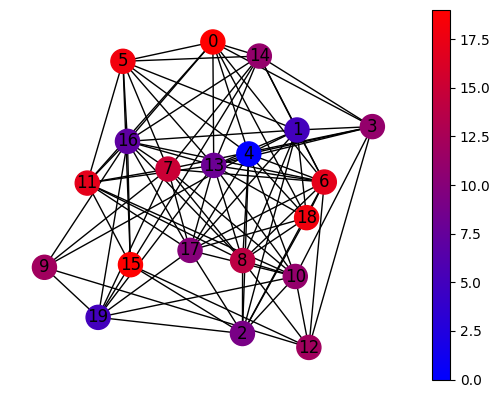

In [119]:
# Create a graph
G = nx.Graph()

# Number of Nodes
num_nodes = range(0, 20)

#Create an array to simulate heat
heat_arr = []
for i in num_nodes:
    heat_arr.append(random.randint(0, 20))

for i in num_nodes:
    G.add_node("{}".format(i), value=heat_arr[i])
    
# Define the probability of adding an edge between nodes
edge_probability = 0.3  # Adjust this as needed

# Define node colors based on their values
node_colors = [node[1]["value"] for node in G.nodes(data=True)]

# Create a colormap for coloring nodes
cmap = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])


# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(heat_arr),vmax=max(heat_arr))

# Turn these into an object that can be used to map time values to colors and
# can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm=cnorm,cmap=cmap)
cpick.set_array([])

# Randomly add edges
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2 and random.random() < edge_probability and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

# Draw the graph (optional)
pos = nx.spring_layout(G)

fig, ax = plt.subplots()
nx.draw(G, pos, node_color=node_colors, cmap=cmap, with_labels=True)
fig.colorbar(cpick ,ax = [ax], location = 'right')
plt.show()

Text(0.5, 1.0, 'Heat at Each Node')

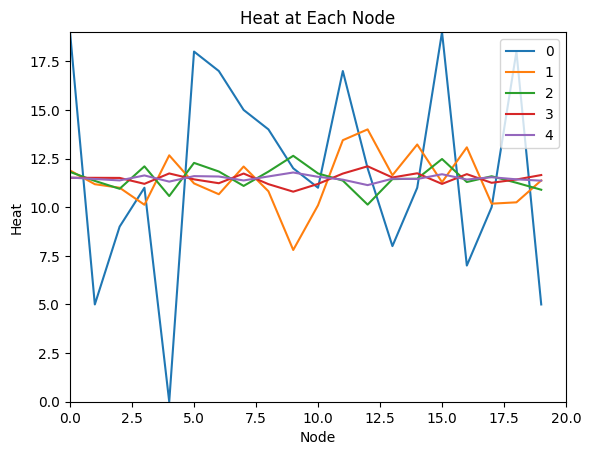

In [124]:
deg_arr = []
for tup in list(G.degree):
    deg_arr.append(tup[1])

Dmat = np.diag(deg_arr)
A = nx.adjacency_matrix(G).toarray()

x = []
for tup in list(G.nodes(data="value")):
    x.append(tup[1])
    
# Get next step
Dinv = np.linalg.inv(Dmat)
max_val = max(x)
time_scale = range(0, 4)

plt.plot(x, label="0")
plt.axis([0, len(x), 0, max_val])
for _ in time_scale:
    x = np.dot(np.dot(Dinv, A), x)
    plt.plot(x, label = "{}".format(_+1))
    plt.axis([0, len(x), 0, max_val])
    
plt.legend(loc = 'upper right')
plt.xlabel("Node")
plt.ylabel("Heat")
plt.title("Heat at Each Node")